In [8]:
import numpy as np

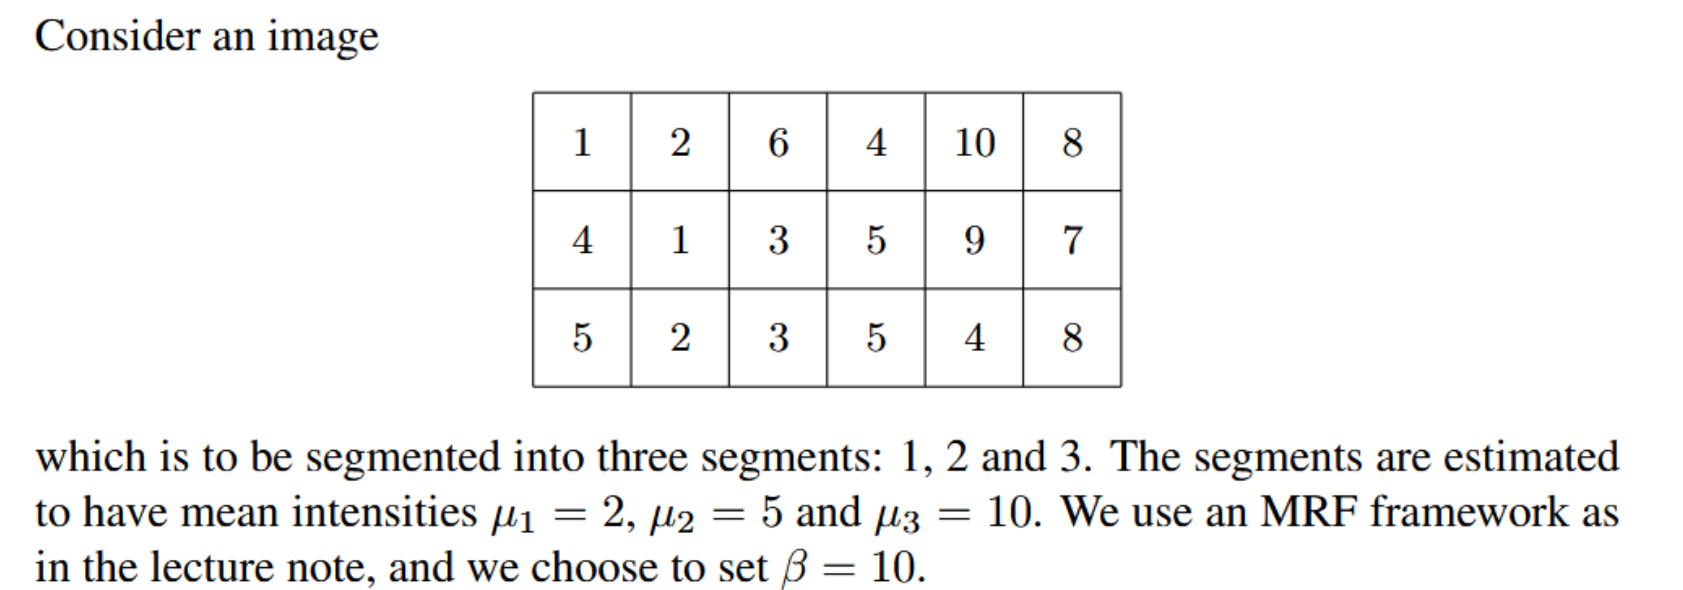

In [9]:
# the image 
d = np.array([[1, 2, 6, 4, 10, 8], 
              [4, 1, 3, 5, 9, 7],
              [5, 2, 3, 5, 4, 8]])

print(f"Shape of the image: {d.shape}")
print(f"Image:\n{d}\n")


# means
mu_1, mu_2, mu_3 = 2, 5, 10
mu = np.array([mu_1, mu_2, mu_3])
# beta
beta = 10

Shape of the image: (3, 6)
Image:
[[ 1  2  6  4 10  8]
 [ 4  1  3  5  9  7]
 [ 5  2  3  5  4  8]]



In [10]:
def segmentation_energy(S, D, mu, beta):
    """
    Calculate the energy of an image segmentation based on the Markov Random Field model.
    
    The total energy consists of two terms:
    1. Likelihood energy (V1): Measures how well the segmentation matches the image data
    2. Prior energy (V2): Encourages spatial smoothness of the segmentation
    
    Parameters:
    -----------
    S : numpy.ndarray
        The segmentation array where each entry is a class label (0, 1, 2, etc.)
    D : numpy.ndarray
        The original image array (same dimensions as S)
    mu : numpy.ndarray
        Array of class means/intensities (mu[i] is the mean intensity of class i)
    beta : float
        Regularization parameter controlling the strength of spatial smoothness
    
    Returns:
    --------
    V1 : float
        Likelihood energy: sum of squared differences between image and class means
    V2 : float
        Prior energy: penalty for neighboring pixels with different classes
        
    Examples:
    ---------
    >>> S = np.array([[0, 0, 1], [1, 0, 0], [1, 0, 0]])
    >>> D = np.array([[1, 2, 6], [4, 1, 3], [5, 2, 3]])
    >>> mu = np.array([2, 5, 10])
    >>> beta = 10
    >>> V1, V2 = segmentation_energy(S, D, mu, beta)
    >>> print(f"Likelihood energy (V1): {V1}")
    >>> print(f"Prior energy (V2): {V2}")
    >>> print(f"Total energy: {V1 + V2}")
    """
    # Step 1: Compute intensity realization
    # Replace each pixel in S with its corresponding class mean from mu
    intensity_realization = np.zeros_like(D)
    for i in range(len(mu)):
        # For each class i, find all pixels belonging to that class
        # and assign them the intensity value mu[i]
        intensity_realization[S == i] = mu[i]
    
    # Step 2: Calculate likelihood energy (V1)
    # Sum of squared differences between the original image and intensity realization
    # This measures how well the segmentation fits the original image data
    V1 = np.sum((D - intensity_realization)**2)
    
    # Step 3: Calculate prior energy (V2)
    # This energy term encourages spatial smoothness by penalizing
    # neighboring pixels that belong to different classes
    V2 = 0
    
    # Check horizontal neighbors
    # Compare each pixel with its right neighbor
    # If they belong to different classes, add beta to V2
    horizontal_diff = (S[:, :-1] != S[:, 1:])
    V2 += np.sum(horizontal_diff) * beta
    
    # Check vertical neighbors
    # Compare each pixel with its bottom neighbor
    # If they belong to different classes, add beta to V2
    vertical_diff = (S[:-1, :] != S[1:, :])
    V2 += np.sum(vertical_diff) * beta
    
    return V1, V2

# Example of use with existing variables in the notebook:
# V1, V2 = segmentation_energy(S, d, mu, beta)
# print(f"Likelihood energy (V1): {V1}")
# print(f"Prior energy (V2): {V2}")
# print(f"Total energy: {V1 + V2}")

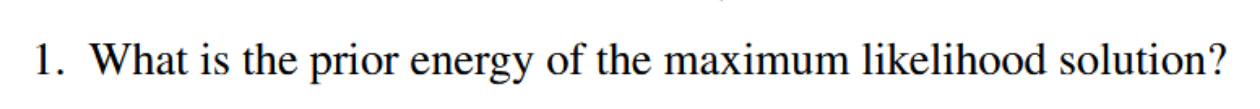

In [11]:
"""
This calculates the maximum likelihood segmentation. Each pixel gets assigned to whichever 
segment mean it's closest to. We use this when:

Finding the "best" segmentation based solely on pixel intensities
Answering questions about the optimal solution (like question #1)
Creating an initial segmentation that will be refined
"""


# Initialize segmentation matrix with zeros (same shape as image)
S_max_liklehood = np.zeros_like(d, dtype=int)

# Perform image segmentation using nearest mean classification
# Each pixel will be assigned to the class with the closest mean intensity
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        # Calculate squared distances between pixel intensity and each class mean
        distances = [(d[i,j] - mean)**2 for mean in mu]
        
        # Assign pixel to class with minimum distance
        # Class labels are 0, 1, 2 (corresponding to mu[0]=2, mu[1]=5, mu[2]=10)
        S_max_liklehood[i,j] = np.argmin(distances)

# Display the resulting segmentation
print(f"Segmentation result (class labels):\n{S_max_liklehood}\n")



_, V2 = segmentation_energy(S_max_liklehood, d, mu, beta)


print(f"Prior energy (V2): {V2}")

Segmentation result (class labels):
[[0 0 1 1 2 2]
 [1 0 0 1 2 1]
 [1 0 0 1 1 2]]

Prior energy (V2): 140


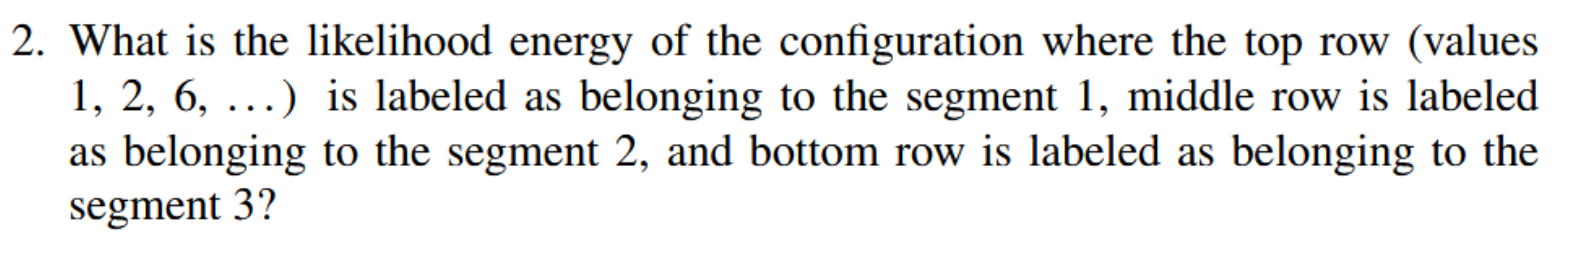

In [5]:

gt = np.array([[0, 0, 0, 0, 0, 0],  # First row -> segment 1 (index 0)
                             [1, 1, 1, 1, 1, 1],  # Second row -> segment 2 (index 1)
                             [2, 2, 2, 2, 2, 2]]) # Third row -> segment 3 (index 2)

V1, _ = segmentation_energy(gt, d, mu, beta)

print(f"Likelihood energy (V1): {V1}")

Likelihood energy (V1): 365


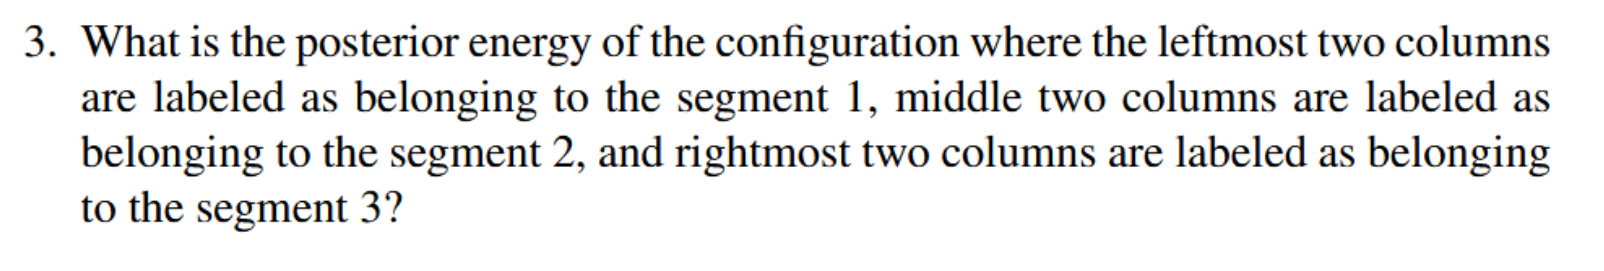

In [7]:

gt = np.array([ [0, 0, 1, 1, 2, 2],  # First row -> segment 1 (index 0)
                [0, 0, 1, 1, 2, 2],  # Second row -> segment 2 (index 1)
                [0, 0, 1, 1, 2, 2]]) # Third row -> segment 3 (index 2)

V_1_3, V_2_3 = segmentation_energy(gt, d, mu, beta)


posterior_energy = V_1_3 + V_2_3

print(f"Likelihood energy (V1): {V_1_3}")
print(f"Prior energy (V2): {V_2_3}")

print(f"Posterior energy (V1 + V2): {posterior_energy}")

Likelihood energy (V1): 79
Prior energy (V2): 60
Posterior energy (V1 + V2): 139


In [14]:
from functions import * 
data = create_entry(prior_maxlikelihood=V2, likelihood_rows=V1, posterior_stripes=posterior_energy)

name_of_file = "quiz.txt"

save_to_file(name_of_file, data)

print(f"Data saved to {name_of_file}")

Data saved to quiz.txt
